# Clustering analysis   

1. we conduct a k-means clustering analysis on the ATL mask. 
We use the simple neurosynth.analysis.cluster.magic function for clustering analysis. By default, the magic() function performs a k-means co-activation based analysis using the same methods as our manuscript. 


In [1]:
%matplotlib inline
import seaborn as sns
from nilearn import plotting as niplt
from matplotlib.colors import ListedColormap
import numpy as np

1.1. dataset loading. This dataset was generated using version 0.6 of Neurosynth (July, 2015) and the features are 400 topics generated using latent Dirichlet allocation (LDA) (dataset was provided by Yarkoni on figshare.com).

In [2]:
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("data/neurosynth_0.6_400_4.pkl")

1.2. Here, we use the magic function to perform the clustering analaysis. For each N we specify, an image is generated and placed in images/. Note that I specifiy that at least 60 studies must activate each voxel to be included in the analysis to ensure a robust classification. 

For the ATL ROI, the following analysis will compute co-activation between each voxel within the ROI and the rest of the brain (reduced into 100 PCA components), and use the resulting distance matrix for classification. 

Note that this step may be computationally intensive. You may use the Clusterable class in neurosynth.analysis.cluster for a more custom analysis to avoid repeating the PCA for each classification if you desire.

The number of clusters is chosen on the basis of sihouette score, consistent with the description in the manuscript.

## whole ATL - N=4

Note that I used a different color scheme in the manuscript.

In [3]:
from neurosynth.analysis.cluster import magic
magic(dataset, roi_mask='masks/Xu_ATLp2.nii', min_studies_per_voxel=60, output_dir='images/', filename= 'whole60_k4.nii', n_clusters=4)

Ventral (red)
dorsal_inf (green)
Para (orange)
dorsal_sup (grey)


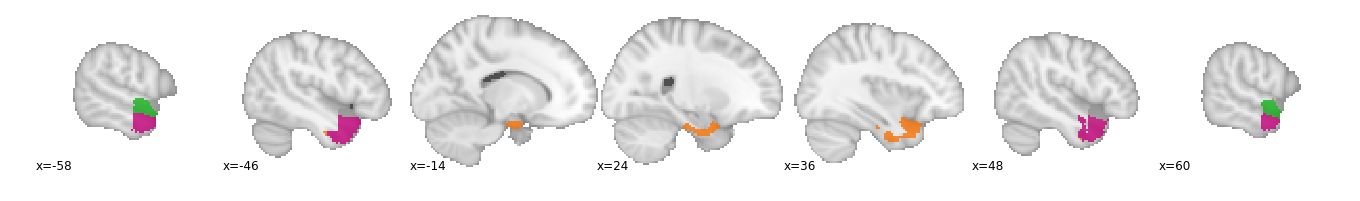

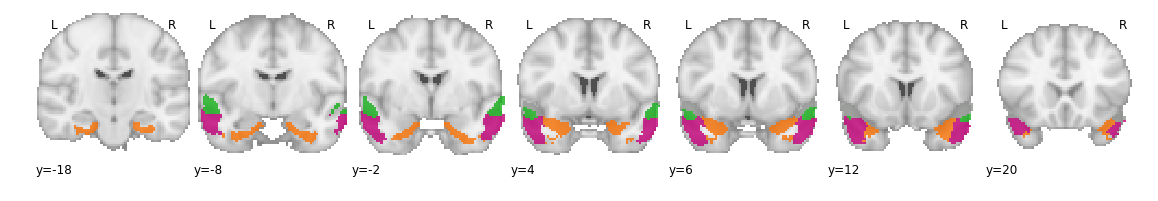

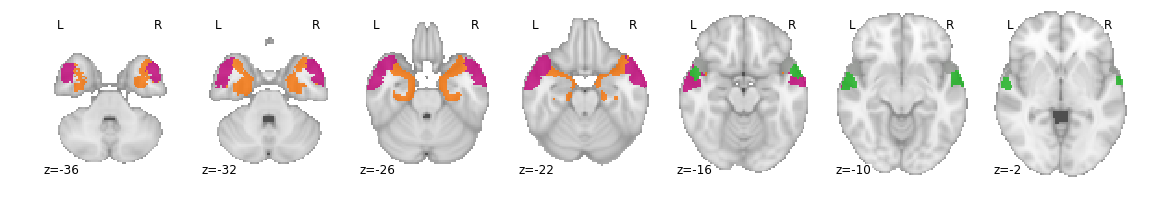

In [4]:
# Generate color palette
colors = ['magenta', "green", "orange",'grey']
colors = sns.xkcd_palette(colors)

niplt.plot_roi('images/wATL/whole60_k4.nii', display_mode='x', 
             draw_cross=False, cmap = ListedColormap(colors), alpha=0.8)

niplt.plot_roi('images/wATL/whole60_k4.nii', display_mode='y', 
             draw_cross=False, cmap = ListedColormap(colors), alpha=0.8)

niplt.plot_roi('images/wATL/whole60_k4.nii', display_mode='z', 
             draw_cross=False, cmap = ListedColormap(colors), alpha=0.8)

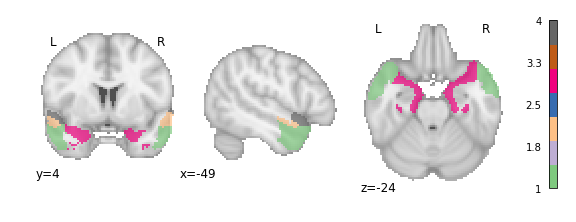

In [6]:
# Generate color palette
niplt.plot_roi('images/wATL/whole60_k4.nii', display_mode='ortho', cut_coords = [-49,4,-24],
             draw_cross=False, colorbar=True, cmap='Accent')

## whole ATL - N=2  (dorsal vs. ventral)

In [7]:
from neurosynth.analysis.cluster import magic
magic(dataset, roi_mask='masks/Xu_ATLp2.nii', min_studies_per_voxel=60, output_dir='images/', n_clusters=2)

1 = ventral
2 = dorsal

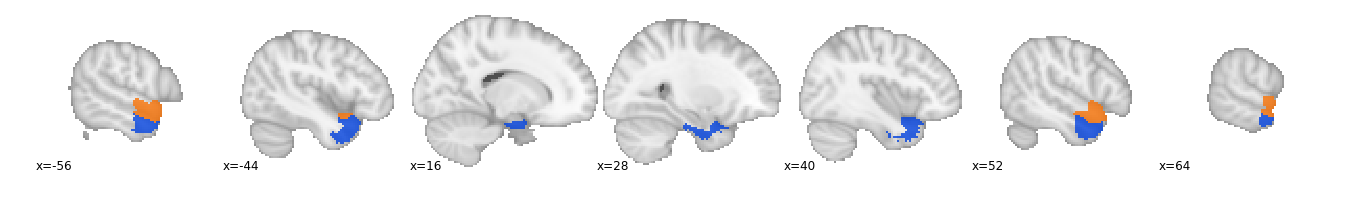

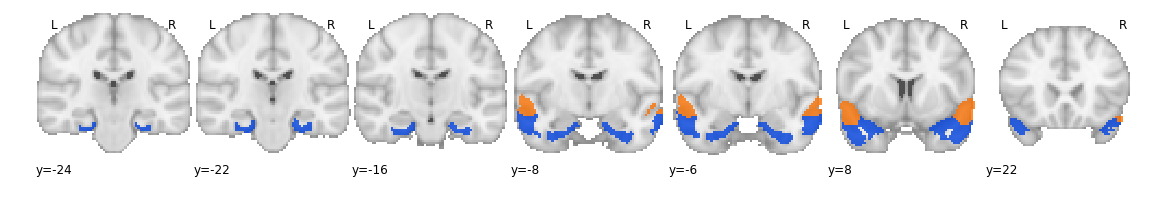

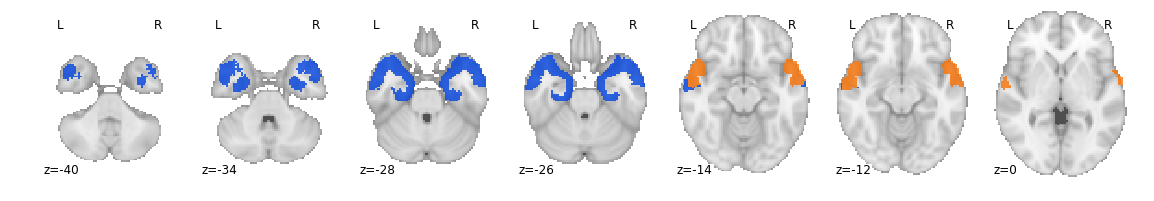

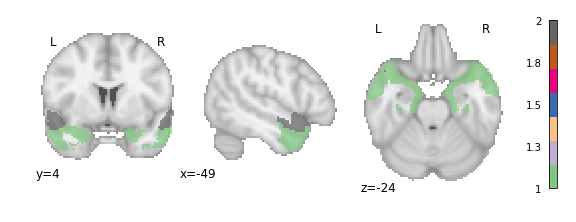

In [8]:
colors = ['blue','orange']
colors = sns.xkcd_palette(colors)

niplt.plot_roi('images/wATL/cluster_labels_k2.nii.gz', display_mode='x', 
             draw_cross=False, cmap = ListedColormap(colors), alpha=0.8)

niplt.plot_roi('images/wATL/cluster_labels_k2.nii.gz', display_mode='y', 
             draw_cross=False, cmap = ListedColormap(colors), alpha=0.8)

niplt.plot_roi('images/wATL/cluster_labels_k2.nii.gz', display_mode='z', 
             draw_cross=False, cmap = ListedColormap(colors), alpha=0.8)

niplt.plot_roi('images/wATL/cluster_labels_k2.nii.gz', display_mode='ortho', cut_coords = [-49,4,-24],
             draw_cross=False, colorbar=True, cmap='Accent')